In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import requests


url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=365'
data = requests.get(url).json()
df = pd.DataFrame.from_dict(data)
df


prices = df["prices"]
market_caps = df["market_caps"]
total_volumes = df["total_volumes"]

#Novas variáveis para limpeza dos dados
btcusdprices = []
btcusdmarketcap = []
btcusdvolume = []
btcusdtime = []
day = 1

#Loop de limpeza dos dados
for i in range(len(prices)):
    price = prices[i]
    marketcap = market_caps[i]
    volume = total_volumes[i]
    
    btcusdtime.append(day)
    day += 1
    
    btcusdmarketcap.append(marketcap[1])
    btcusdvolume.append(volume[1])
    btcusdprices.append(price[1])
    

#Criação de Dataframe
btcusd = {"BTCUSD":btcusdprices, "MarketCap":btcusdmarketcap, "Volume":btcusdvolume}
df_btc_prices = pd.DataFrame(data=btcusd, index=btcusdtime)
df_btc_prices

,BTCUSD,MarketCap,Volume
1,9003.24056,165335617639.04947,43436234291.97107
2,9144.68704,167950864937.14679,48538811466.80270
3,9959.16642,182927847431.44946,61712313964.69186
4,9821.81132,180421762956.34860,50955646313.40579
5,9566.77719,175752574354.63544,46706541180.09866
...,...,...,...
362,57812.96916,1080897634123.29370,43967070045.82312
363,56600.74529,1057850321948.54651,39072664393.92941
364,57200.30030,1069571255195.51892,54132470274.07509
365,53464.37022,999775008412.37378,71296763919.13268


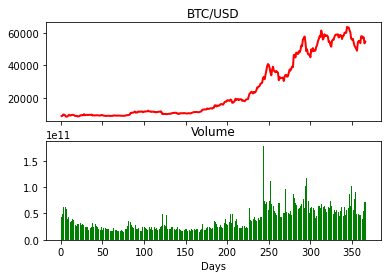

In [46]:
f, axarr = plt.subplots(2, sharex=True)


axarr[0].set_title("BTC/USD")
axarr[0].plot(df_btc_prices["BTCUSD"], 
              label = "BTC/USD", 
              linewidth = "2",
              color = "r")

#axarr[1].set_title("MarketCap")
#axarr[1].plot(df_btc_prices["MarketCap"], 
#              label = "MarketCap", 
#              linewidth = "2",
#              color = "g")

axarr[1].set_title("Volume")
axarr[1].bar(btcusdtime, 
             df_btc_prices["Volume"], 
             color = "g",
             label = "MarketCap")

plt.xlabel("Days")
plt.show()